In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.loader import DataCollector
from scripts.models import SMModel
from scripts.utils import *

In [2]:
# collect and split processed data
dc = DataCollector()
test = dc.get_test_data(path='data/test.csv')
train, val = dc.collect_split_data(path_to_train='data/train.csv')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75993 entries, 0 to 75992
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    75993 non-null  int64         
 1   datetime  75993 non-null  datetime64[ns]
 2   energy    75993 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


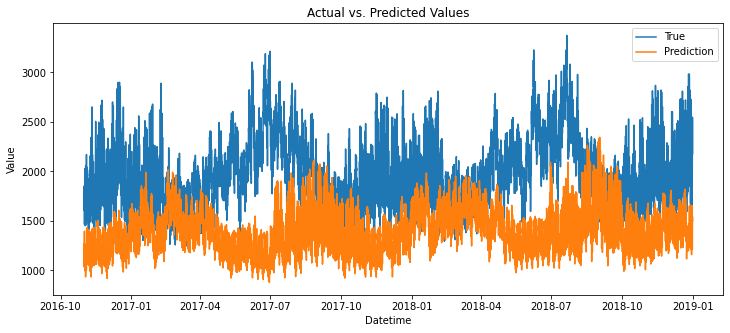

                            AutoReg Model Results                             
Dep. Variable:                 energy   No. Observations:                75993
Model:                     AutoReg(1)   Log Likelihood             -419890.241
Method:               Conditional MLE   S.D. of innovations             60.735
Date:                Mon, 12 Dec 2022   AIC                         839786.482
Time:                        07:17:42   BIC                         839814.197
Sample:                             1   HQIC                        839794.998
                                75993                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0598      1.095     24.723      0.000      24.915      29.205
energy.L1      0.9834      0.001   1493.626      0.000       0.982       0.985
                                    Roots           

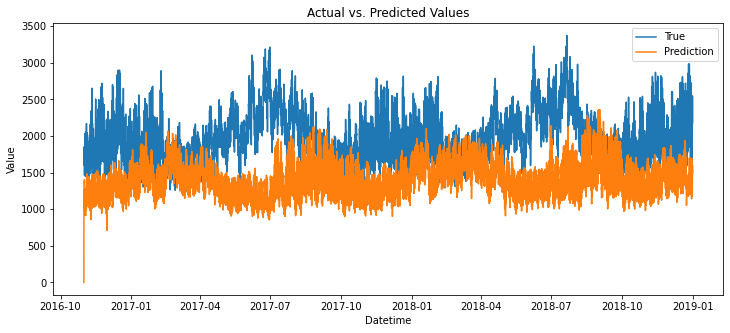

                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                75993
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -390210.800
Date:                Mon, 12 Dec 2022   AIC                         780427.601
Time:                        07:17:49   BIC                         780455.316
Sample:                             0   HQIC                        780436.117
                              - 75993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6639      0.003    229.203      0.000       0.658       0.670
ma.L1          0.1561      0.002     68.566      0.000       0.152       0.161
sigma2      1692.0409      3.059    553.050      0.0

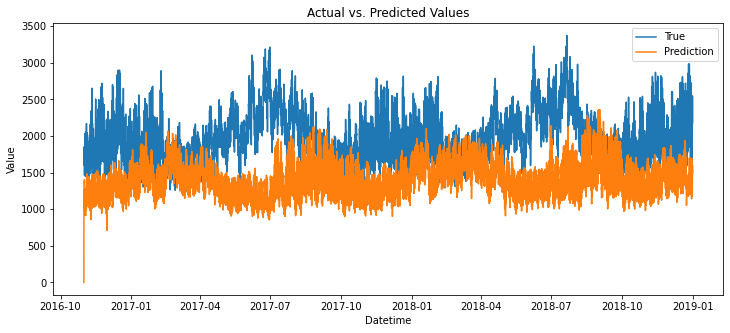

                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                75993
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -390210.800
Date:                Mon, 12 Dec 2022   AIC                         780427.601
Time:                        07:18:07   BIC                         780455.316
Sample:                             0   HQIC                        780436.117
                              - 75993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6639      0.003    229.203      0.000       0.658       0.670
ma.L1          0.1561      0.002     68.566      0.000       0.152       0.161
sigma2      1692.0409      3.059    553.050      0.0

In [10]:
for mod in ['AR', 'ARIMA', 'SARIMA']:
    model = SMModel(mod)
    model.fit_(train[['energy']])
    preds = model.predict_(0, len(val)-1)

    print(f"#### {mod} MODEL ####")
    summ_and_score(model.model, val['energy'], preds)
    plot_preds(val, preds)
